In [1]:
import pandas as pd
from con import engine , Session
from database import Customer, Invoice, Item  # Import your SQLAlchemy models
import re
import matplotlib.pyplot as plt


Connection successful!


In [2]:
def extract_numeric_value(s):
    numeric_part = re.search(r'\d+\.\d+', s)
    if numeric_part:
        return float(numeric_part.group())
    else:
        return None

In [3]:
def get_data_as_dataframe():
    session = Session()
    try:
        # Querying data from the database using ORM with relationships
        query_result = session.query(Customer, Invoice, Item).\
            join(Invoice, Customer.invoices).\
            join(Item, Invoice.items).all()

        # Extracting data into lists
        data = []
        for customer, invoice, item in query_result:
            # Extract numeric value from the total
            total = extract_numeric_value(invoice.total)

            data.append({
                'Customer ID': customer.id,
                'Customer Name': customer.customer_name,
                'Address': customer.address,
                'Category': customer.category,
                'Invoice Number': invoice.invoice_number,
                'Date': invoice.date,
                'Total': total,
                'Description': item.description,
                'Amount': item.amount,
                'Quantity': item.quantity
            })

        # Converting data into DataFrame
        df = pd.DataFrame(data)
        return df
    finally:
        session.close()
df = get_data_as_dataframe()
print(df)

       Customer ID           Customer Name  \
0              297  Sébastien Jean-Vasseur   
1              297  Sébastien Jean-Vasseur   
2              297  Sébastien Jean-Vasseur   
3              297  Sébastien Jean-Vasseur   
4              298             Sarah Smith   
...            ...                     ...   
26497          842           Camille Robin   
26498          842           Camille Robin   
26499          842           Camille Robin   
26500          842           Camille Robin   
26501          842           Camille Robin   

                                                 Address Category  \
0      19246 Flowers Lake Suite 939, New Audreycheste...        C   
1      19246 Flowers Lake Suite 939, New Audreycheste...        C   
2      19246 Flowers Lake Suite 939, New Audreycheste...        C   
3      19246 Flowers Lake Suite 939, New Audreycheste...        C   
4           0496 Brianna Crossing, New Tabitha, RI 41854        C   
...                              

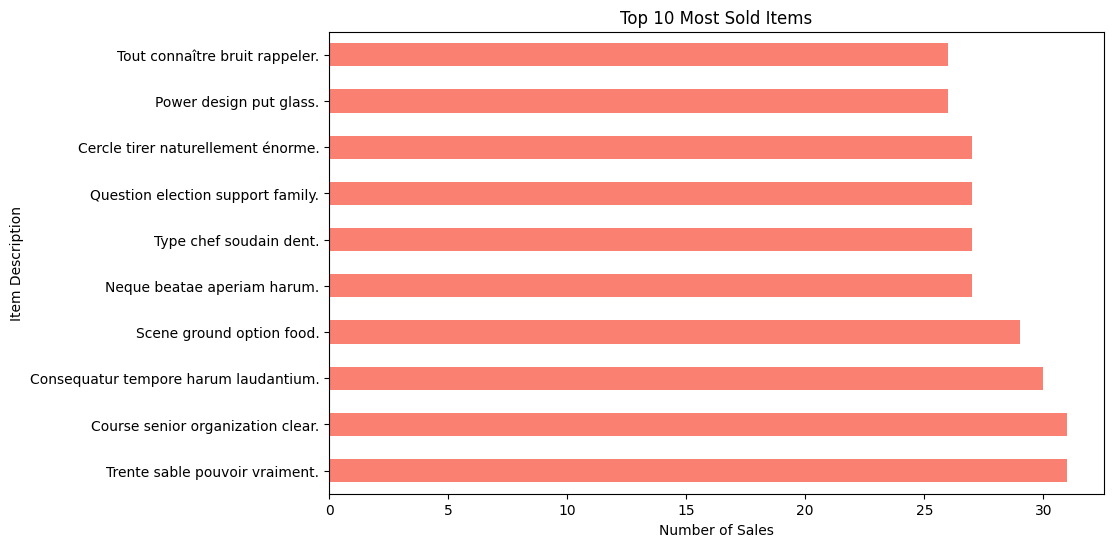

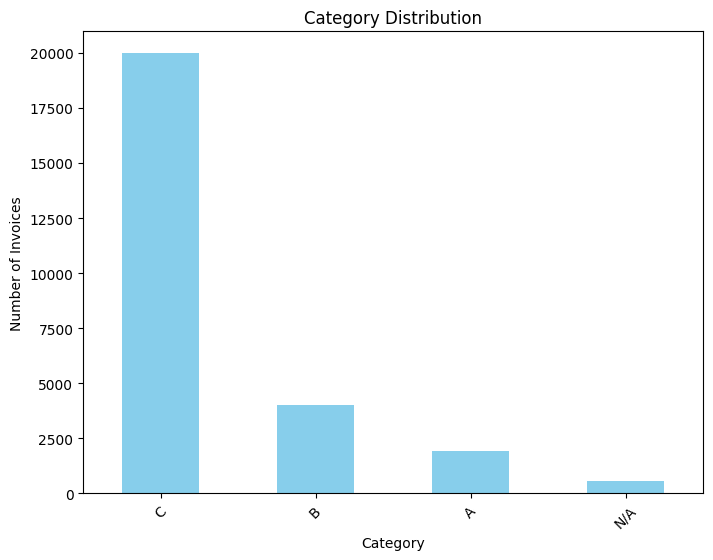

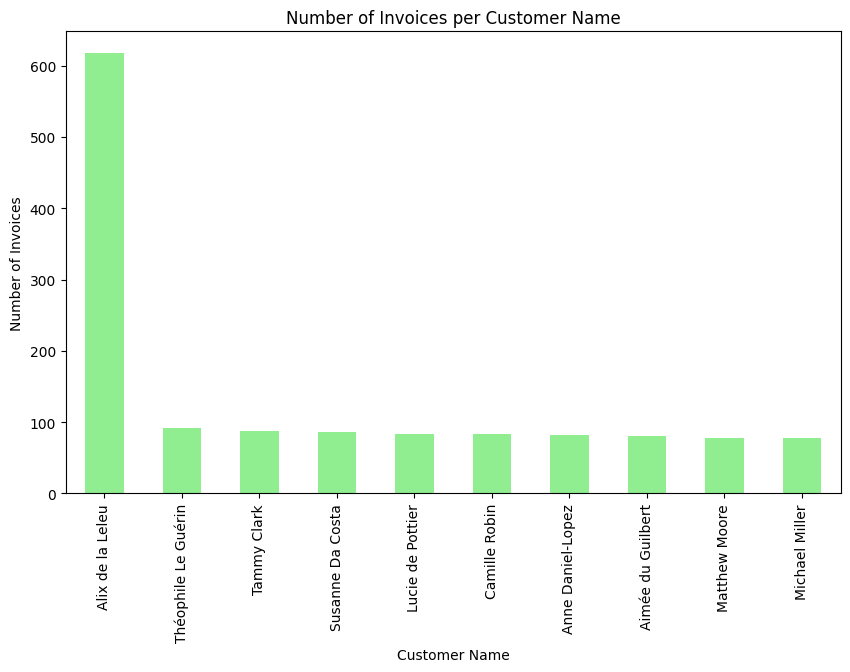

In [4]:
def generate_graphs(df):
    # Category Distribution
    category_counts = df['Category'].value_counts()
    plt.figure(figsize=(8, 6))
    category_counts.plot(kind='bar', color='skyblue')
    plt.title('Category Distribution')
    plt.xlabel('Category')
    plt.ylabel('Number of Invoices')
    plt.xticks(rotation=45)
    plt.show()

    # Number of Invoices per Customer Name
    customer_invoice_counts = df['Customer Name'].value_counts().nlargest(10)
    plt.figure(figsize=(10, 6))
    customer_invoice_counts.plot(kind='bar', color='lightgreen')
    plt.title('Number of Invoices per Customer Name')
    plt.xlabel('Customer Name')
    plt.ylabel('Number of Invoices')
    plt.xticks(rotation=90)
    plt.show()
    
 # Most Sold Items
most_sold_items = df['Description'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
most_sold_items.plot(kind='barh', color='salmon')  # Change kind to 'barh'
plt.title('Top 10 Most Sold Items')
plt.xlabel('Number of Sales')  # Reversed x and y labels for horizontal plot
plt.ylabel('Item Description')
plt.show()

# Usage
df = get_data_as_dataframe()  # Assuming you have a function to retrieve DataFrame
generate_graphs(df)

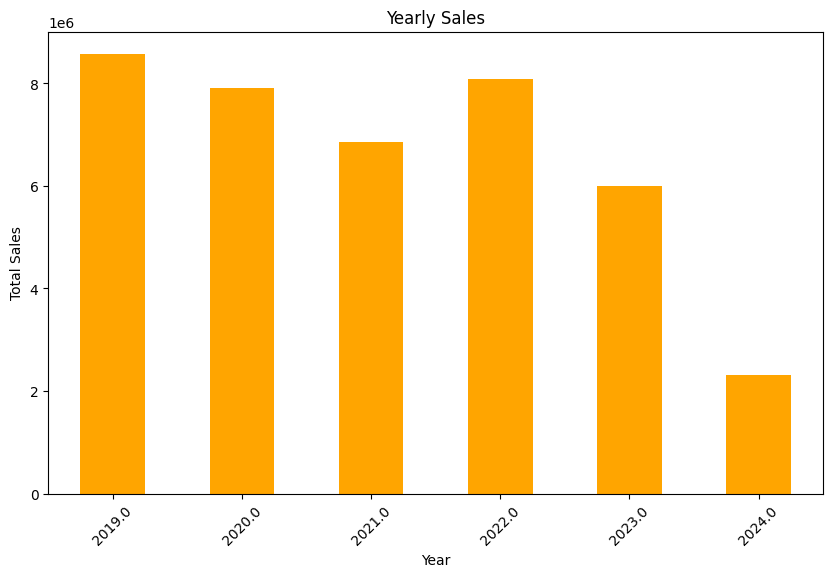

In [5]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

    # Aggregate sales data based on the year
yearly_sales = df.groupby('Year')['Total'].sum()

# Plotting the yearly sales
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar', color='orange')
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()



Descriptive Statistics for Numeric Columns:
        Customer ID         Total        Amount      Quantity
count  26502.000000  26482.000000  26502.000000  26502.000000
mean     744.170666   1505.935591     49.750049      4.932722
std      282.848532    739.737957     64.244042      2.582557
min      297.000000      0.330000      0.050000      1.000000
25%      494.000000    956.570000     22.710000      3.000000
50%      722.000000   1472.745000     46.470000      5.000000
75%      980.000000   1986.652500     73.810000      7.000000
max     1295.000000   4922.740000   2742.540000      9.000000

Descriptive Statistics for Non-Numeric Columns:

Column: Customer Name
count                26502
unique                 995
top       Alix de la Leleu
freq                   617
Name: Customer Name, dtype: object

Column: Address
count                                            26502
unique                                             998
top       1, boulevard Julien Leclerc, 45997 Blanchard


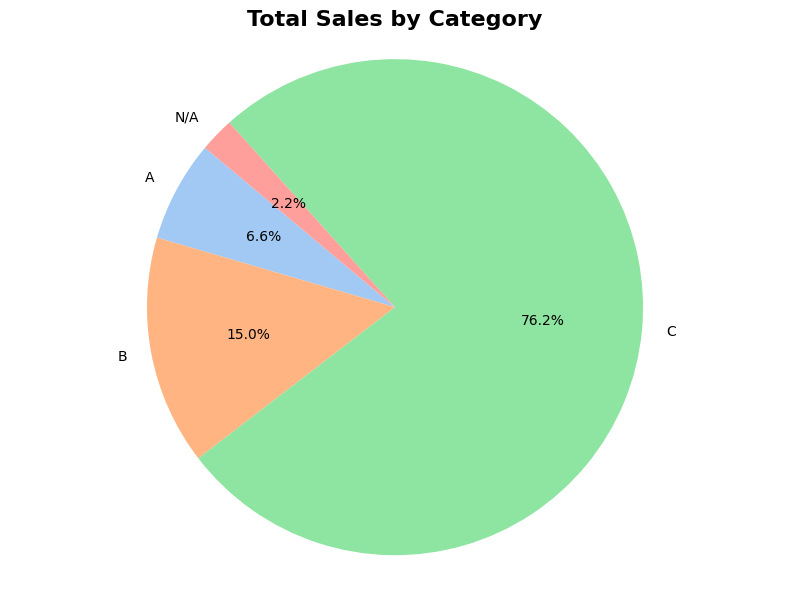

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_sales_data(df):
    # Descriptive Statistics for Numeric Columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    if not numeric_df.empty:
        print("\nDescriptive Statistics for Numeric Columns:")
        print(numeric_df.describe())

    # Descriptive Statistics for Non-Numeric Columns
    non_numeric_df = df.select_dtypes(exclude=['float64', 'int64'])
    if not non_numeric_df.empty:
        print("\nDescriptive Statistics for Non-Numeric Columns:")
        for column in non_numeric_df.columns:
            print(f"\nColumn: {column}")
            print(non_numeric_df[column].describe())

    # Correlation Analysis (only on numeric columns)
    if not numeric_df.empty:
        print("\nCorrelation Analysis:")
        print(numeric_df.corr())



    # Category Analysis: Total Sales by Category
    category_sales = df.groupby('Category')['Total'].sum()
    plt.figure(figsize=(8, 6))
    ax = category_sales.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
    ax.set_title('Total Sales by Category', fontsize=16, fontweight='bold')
    plt.ylabel('')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


# Usage
df = get_data_as_dataframe()  # Assuming you have a function to retrieve DataFrame
analyze_sales_data(df)


In [7]:
def perform_statistical_analysis(df):
    # Drop 'Customer ID' column
    df = df.drop(columns=['Customer ID'])

    # Descriptive Statistics
    print("\nDescriptive Statistics:")
    print(df.describe())

    # Correlation Analysis
    print("\nCorrelation Analysis:")
    # Exclude non-numeric columns from correlation analysis
    numeric_columns = df.select_dtypes(include=['number']).columns
    correlation_matrix = df[numeric_columns].corr()
    print(correlation_matrix)

    # Customer Analysis
    print("\nCustomer Analysis:")
    customer_analysis = df.groupby('Customer Name')['Total'].agg(['sum', 'count'])
    print(customer_analysis)

    # Category Analysis
    print("\nCategory Analysis:")
    category_analysis = df.groupby('Category')['Total'].agg(['sum', 'mean', 'count'])
    print(category_analysis)

    # Item Analysis
    print("\nItem Analysis:")
    item_analysis = df.groupby('Description')[['Quantity', 'Total']].agg(['sum'])
    print(item_analysis)
    
df = get_data_as_dataframe() 
perform_statistical_analysis(df)


Descriptive Statistics:
              Total        Amount      Quantity
count  26482.000000  26502.000000  26502.000000
mean    1505.935591     49.750049      4.932722
std      739.737957     64.244042      2.582557
min        0.330000      0.050000      1.000000
25%      956.570000     22.710000      3.000000
50%     1472.745000     46.470000      5.000000
75%     1986.652500     73.810000      7.000000
max     4922.740000   2742.540000      9.000000

Correlation Analysis:
             Total    Amount  Quantity
Total     1.000000  0.100956  0.155024
Amount    0.100956  1.000000  0.007410
Quantity  0.155024  0.007410  1.000000

Customer Analysis:
                                     sum  count
Customer Name                                  
Achille Chiaramonte-Fibonacci    2582.62      8
Achille Novaro                   6258.60     14
Adam Marquez                    61633.88     35
Adelasia Trapani                 7045.18     16
Adrienne Pelletier              83440.16     39
...     

In [8]:
def perform_statistical_analysis(df):
    # Drop 'Customer ID' column
    df = df.drop(columns=['Customer ID'])

    # Descriptive Statistics
    print("\nDescriptive Statistics:")
    print(df.describe())

    # Correlation Analysis
    print("\nCorrelation Analysis:")
    # Exclude non-numeric columns from correlation analysis
    numeric_columns = df.select_dtypes(include=['number']).columns
    correlation_matrix = df[numeric_columns].corr()
    print(correlation_matrix)
    # Plot correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

    # Customer Analysis
    print("\nCustomer Analysis:")
    customer_analysis = df.groupby('Customer Name')['Total'].agg(['sum', 'count'])
    print(customer_analysis)
    # Plot customer analysis
    plt.figure(figsize=(10, 6))
    sns.barplot(x=customer_analysis.index, y='sum', data=customer_analysis, palette='viridis')
    plt.title("Total Sales by Customer")
    plt.xlabel("Customer Name")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Category Analysis
    print("\nCategory Analysis:")
    category_analysis = df.groupby('Category')['Total'].agg(['sum', 'mean', 'count'])
    print(category_analysis)
    # Plot category analysis
    category_analysis.plot(kind='bar', figsize=(10, 6))
    plt.title("Category Analysis")
    plt.xlabel("Category")
    plt.ylabel("Values")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Item Analysis
    print("\nItem Analysis:")
    item_analysis = df.groupby('Description')[['Quantity', 'Total']].agg(['sum'])
    print(item_analysis)
    # Plot item analysis
    item_analysis.plot(kind='bar', figsize=(12, 6), stacked=True)
    plt.title("Item Analysis")
    plt.xlabel("Description")
    plt.ylabel("Values")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



Descriptive Statistics:
              Total        Amount      Quantity
count  26482.000000  26502.000000  26502.000000
mean    1505.935591     49.750049      4.932722
std      739.737957     64.244042      2.582557
min        0.330000      0.050000      1.000000
25%      956.570000     22.710000      3.000000
50%     1472.745000     46.470000      5.000000
75%     1986.652500     73.810000      7.000000
max     4922.740000   2742.540000      9.000000

Correlation Analysis:
             Total    Amount  Quantity
Total     1.000000  0.100956  0.155024
Amount    0.100956  1.000000  0.007410
Quantity  0.155024  0.007410  1.000000


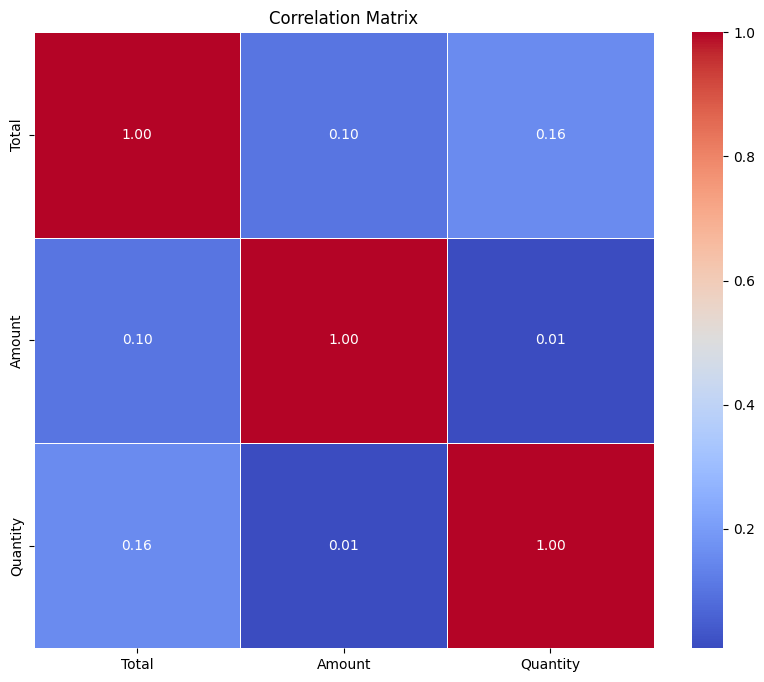


Customer Analysis:
                                     sum  count
Customer Name                                  
Achille Chiaramonte-Fibonacci    2582.62      8
Achille Novaro                   6258.60     14
Adam Marquez                    61633.88     35
Adelasia Trapani                 7045.18     16
Adrienne Pelletier              83440.16     39
...                                  ...    ...
Éric Michaud                   110807.94     56
Étienne Bousquet-Peron          71338.69     32
Étienne Dupré                  125001.95     60
Étienne Joubert                 17485.68     21
Étienne Vaillant du Riou        84808.18     40

[995 rows x 2 columns]


/var/folders/yx/d2z__2kd35b0k7rjytjgykzw0000gn/T/ipykernel_71358/4287229554.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_analysis.index, y='sum', data=customer_analysis, palette='viridis')


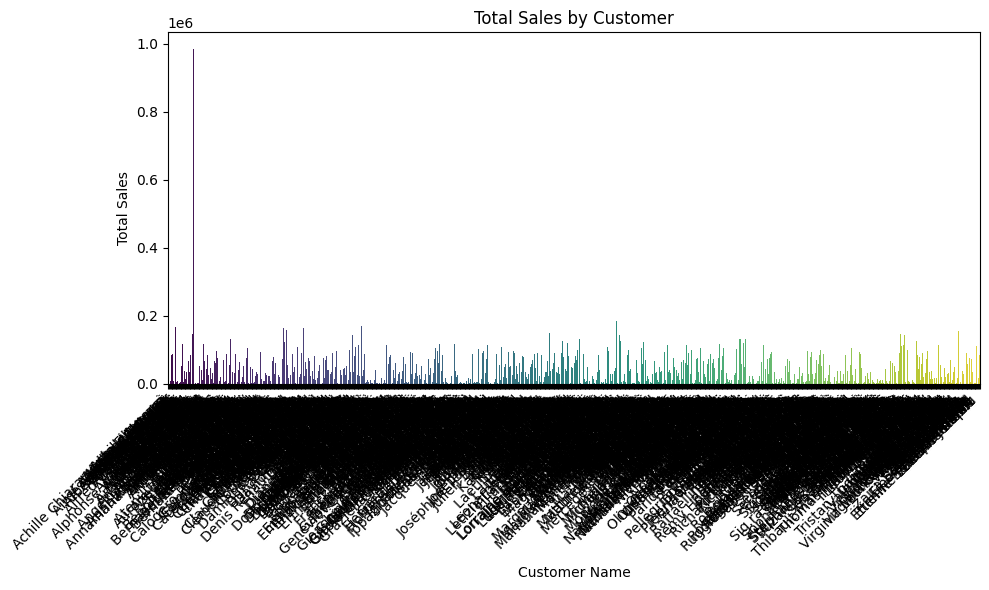


Category Analysis:
                  sum         mean  count
Category                                 
A          2626722.26  1364.531044   1925
B          5963628.06  1488.302486   4007
C         30394306.50  1522.455745  19964
N/A         895529.50  1528.207338    586


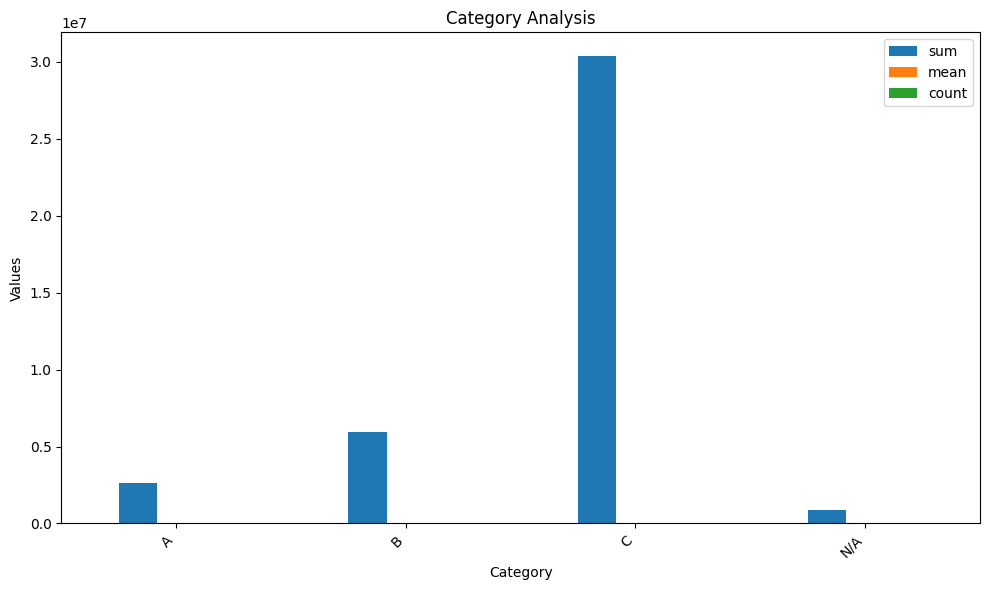


Item Analysis:
                              Quantity     Total
                                   sum       sum
Description                                     
0.19 Euro                          7.0    570.44
0.78 Euro                          9.0   1748.31
0.84 Euro                          4.0   1352.59
00 01 07                           8.0   2489.19
00 11- m 10                        8.0   1175.96
...                                ...       ...
Être foi dela clair.               6.0   2827.85
Être foi delà clair.              50.0  15427.43
Être seuil discuter delà           6.0   3849.78
Être seuil discuter delà.         43.0   8058.33
Île train impossible oublier.     65.0  22240.61

[2379 rows x 2 columns]


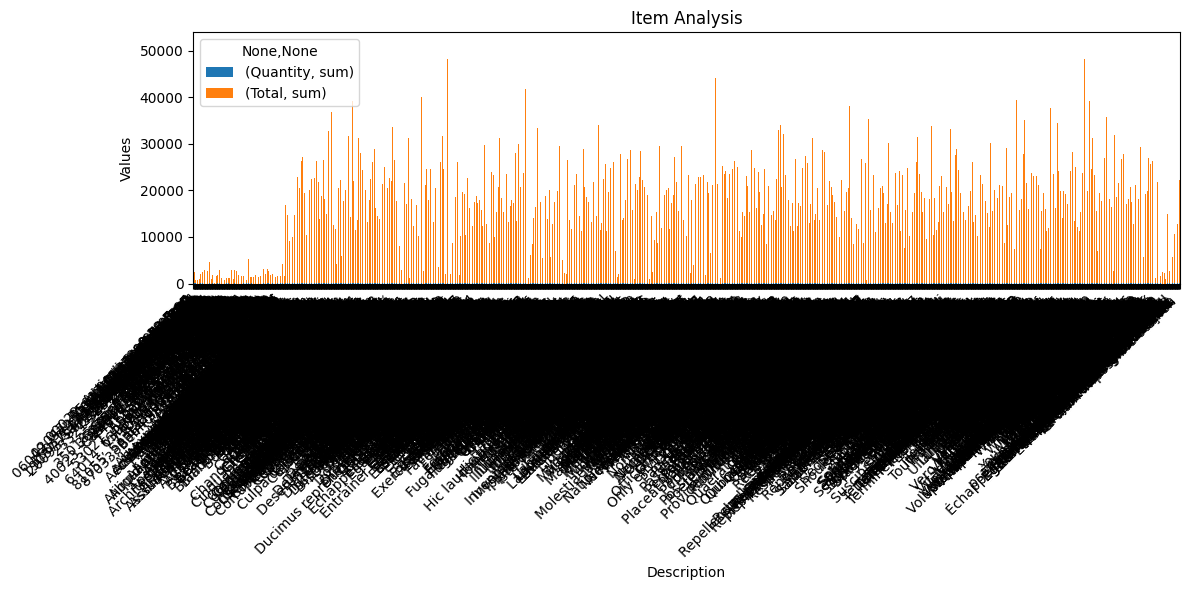

In [9]:
perform_statistical_analysis(df)

In [10]:
import io
import base64

In [11]:
def perform_statistical_analysis(df):
    # Drop 'Customer ID' column
    df = df.drop(columns=['Customer ID'])

    # Descriptive Statistics
    print("\nDescriptive Statistics:")
    print(df.describe())

    # Correlation Analysis
    print("\nCorrelation Analysis:")
    # Exclude non-numeric columns from correlation analysis
    numeric_columns = df.select_dtypes(include=['number']).columns
    correlation_matrix = df[numeric_columns].corr()
    print(correlation_matrix)
    # Plot correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

    # Customer Analysis
    print("\nCustomer Analysis:")
    customer_analysis = df.groupby('Customer Name')['Total'].agg(['sum', 'count'])
    customer_analysis = customer_analysis.nlargest(10, 'sum')  # Select top 10 customers by total sales
    print(customer_analysis)
    # Plot customer analysis
    plt.figure(figsize=(10, 6))
    sns.barplot(x=customer_analysis.index, y='sum', data=customer_analysis, palette='viridis')
    plt.title("Top 10 Customers by Total Sales")
    plt.xlabel("Customer Name")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Category Analysis
    print("\nCategory Analysis:")
    category_analysis = df.groupby('Category')['Total'].agg(['sum', 'mean', 'count'])
    category_analysis = category_analysis.nlargest(10, 'sum')  # Select top 10 categories by total sales
    print(category_analysis)
    # Plot category analysis
    category_analysis.plot(kind='bar', figsize=(10, 6))
    plt.title("Top 10 Categories by Total Sales")
    plt.xlabel("Category")
    plt.ylabel("Values")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    
    
    category_sales = df.groupby('Category')['Total'].sum()
    print(category_sales)
     
    
    plt.figure(figsize=(8, 6))
    ax = category_sales.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
    ax.set_title('Total Sales by Category', fontsize=16, fontweight='bold')
    plt.ylabel('')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

    

    # Item Analysis
    print("\nItem Analysis:")
    item_analysis = df.groupby('Description')[['Quantity', 'Total']].agg(['sum'])
    item_analysis = item_analysis.nlargest(10, ('Total', 'sum'))  # Select top 10 items by total sales
    print(item_analysis)
    # Plot item analysis
    item_analysis.plot(kind='bar', figsize=(12, 6), stacked=True)
    plt.title("Top 10 Items by Total Sales")
    plt.xlabel("Description")
    plt.ylabel("Values")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


Descriptive Statistics:
              Total        Amount      Quantity
count  26482.000000  26502.000000  26502.000000
mean    1505.935591     49.750049      4.932722
std      739.737957     64.244042      2.582557
min        0.330000      0.050000      1.000000
25%      956.570000     22.710000      3.000000
50%     1472.745000     46.470000      5.000000
75%     1986.652500     73.810000      7.000000
max     4922.740000   2742.540000      9.000000

Correlation Analysis:
             Total    Amount  Quantity
Total     1.000000  0.100956  0.155024
Amount    0.100956  1.000000  0.007410
Quantity  0.155024  0.007410  1.000000


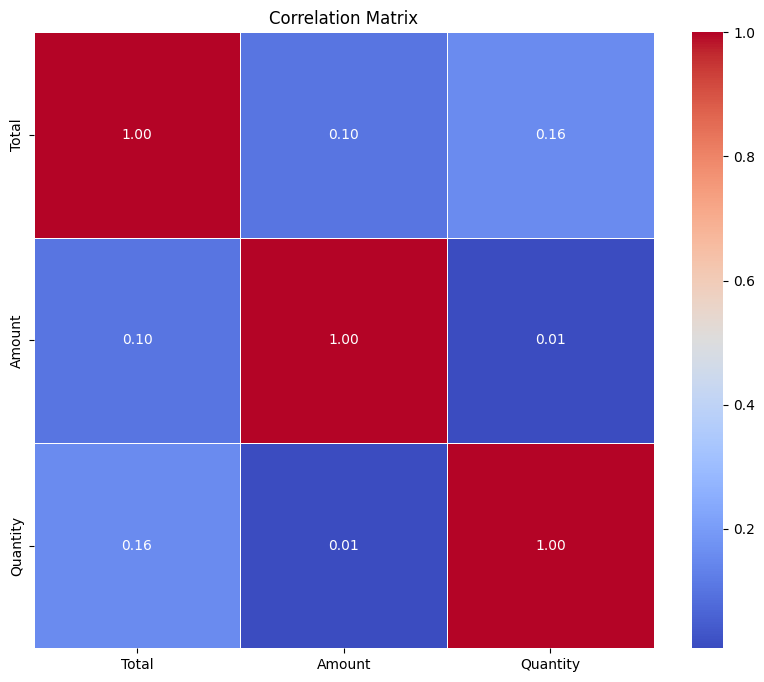


Customer Analysis:
                               sum  count
Customer Name                            
Alix de la Leleu         984715.33    617
Théophile Le Guérin      194549.49     92
Lucie de Pottier         184308.34     84
Diane Léger              169327.07     68
Aimée du Guilbert        167257.15     80
Camille Robin            164923.08     83
Charlotte du Leroy       163676.47     65
Pauline Delmas           161663.00     76
Patricia Ribeiro         158843.81     75
Caroline Monnier-Boutin  158759.25     64


/var/folders/yx/d2z__2kd35b0k7rjytjgykzw0000gn/T/ipykernel_71358/2825476817.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_analysis.index, y='sum', data=customer_analysis, palette='viridis')


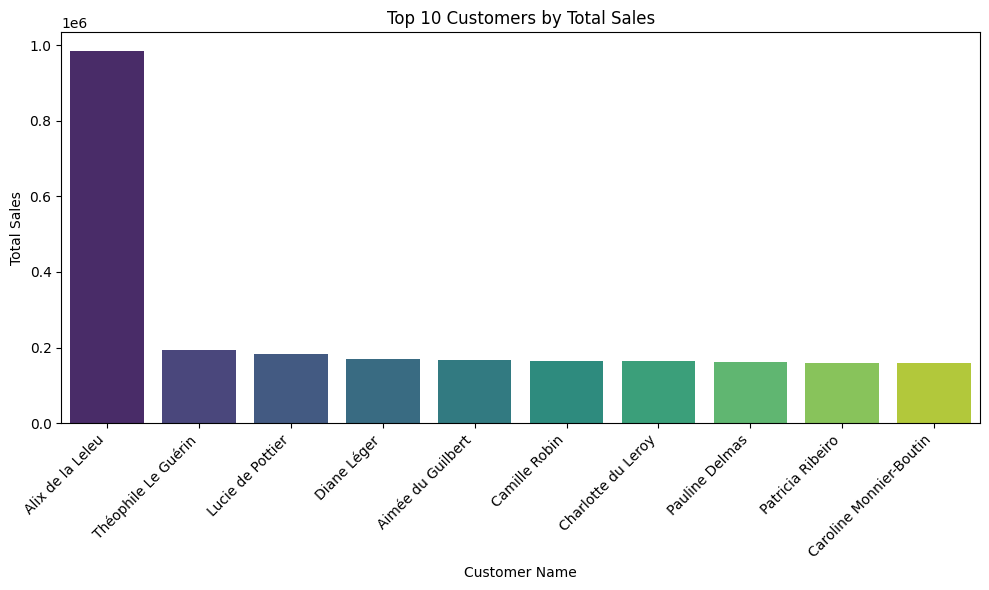


Category Analysis:
                  sum         mean  count
Category                                 
C         30394306.50  1522.455745  19964
B          5963628.06  1488.302486   4007
A          2626722.26  1364.531044   1925
N/A         895529.50  1528.207338    586


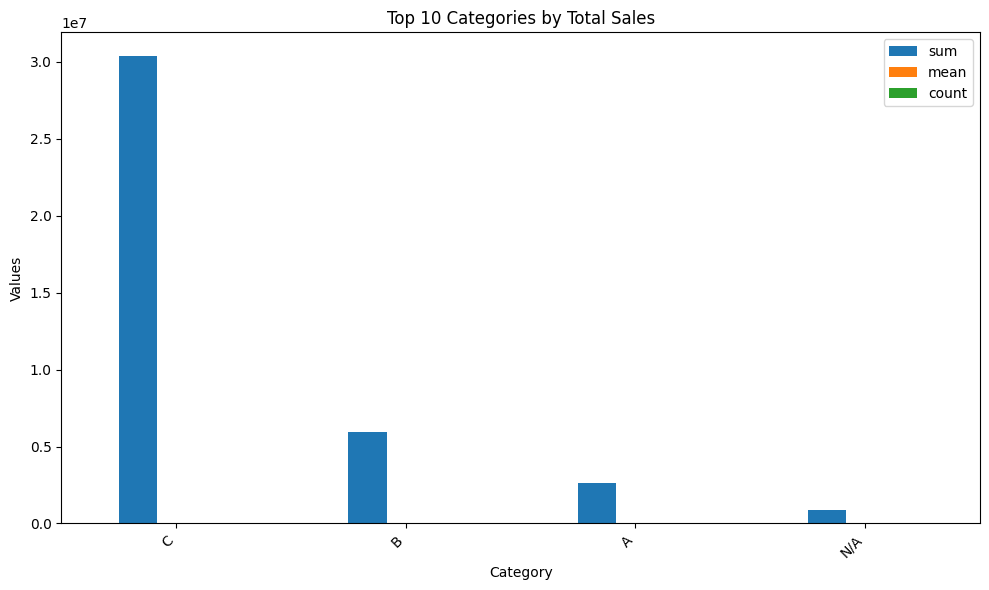

Category
A       2626722.26
B       5963628.06
C      30394306.50
N/A      895529.50
Name: Total, dtype: float64


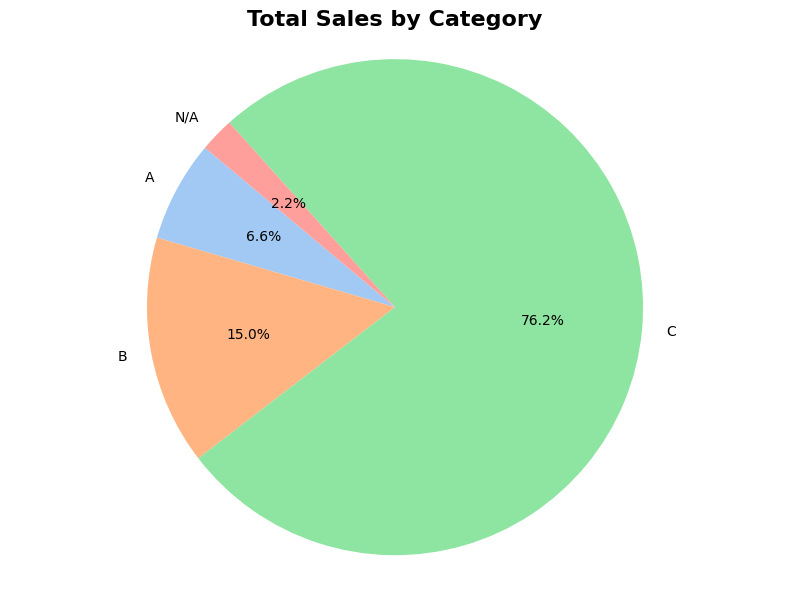


Item Analysis:
                                      Quantity     Total
                                           sum       sum
Description                                             
Scene ground option food.                151.0  51252.67
Trente sable pouvoir vraiment.           147.0  48167.09
Course senior organization clear.        133.0  48071.29
Consequatur tempore harum laudantium.    130.0  45718.34
Cercle tirer naturellement énorme.       137.0  45306.16
Dolorum molestias enim aliquam.          142.0  44748.00
Honte de projet gros.                    119.0  44006.44
Liberté humain détruire ce.              105.0  43985.08
Demain posséder gagner vent.             114.0  43098.75
Check especially four deep.              144.0  41990.98


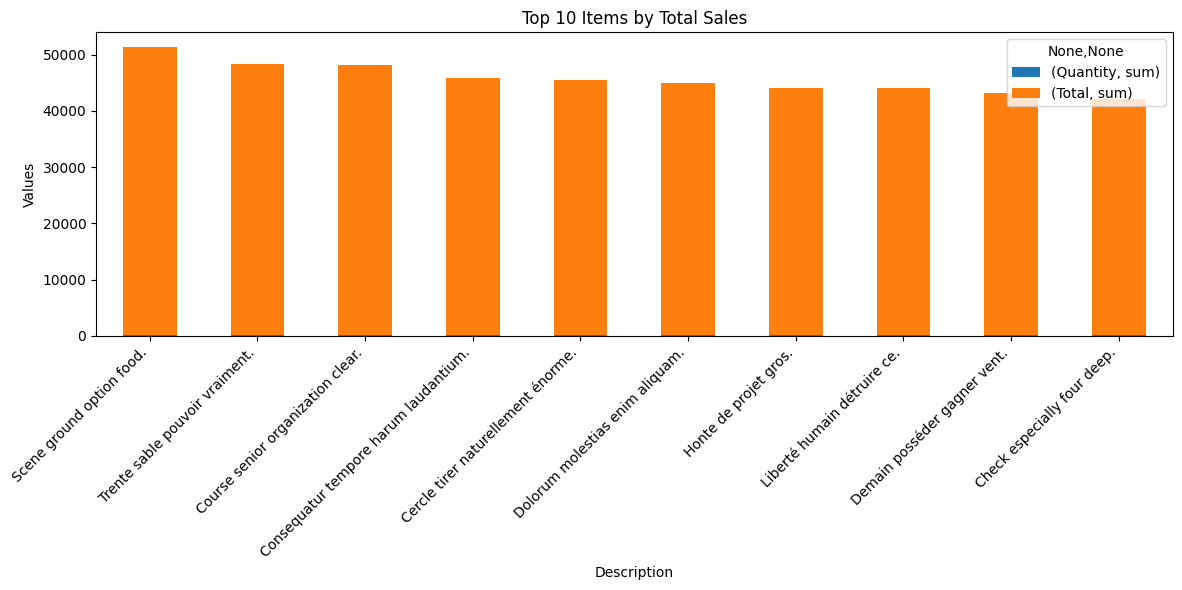

In [12]:
perform_statistical_analysis(df)

/var/folders/yx/d2z__2kd35b0k7rjytjgykzw0000gn/T/ipykernel_71358/3717732855.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_analysis.index, y='sum', data=customer_analysis, palette='viridis')


('iVBORw0KGgoAAAANSUhEUgAAA+gAAAMgCAYAAACwGEg9AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAABfY0lEQVR4nO3deZxVdf0/8NedgRn2AUQWN0Ak98Rckcwlzcw0K8ulFHGpTHNByygVl75hbmmZaYZL/XLpW1YWpRaKfc1dI7XQrwuKC6CA7KvM/f3h17EJ1KtyuQd4Ph+P83gw537uue8zzcl5zftzPqdULpfLAQAAAGqqrtYFAAAAAAI6AAAAFIKADgAAAAUgoAMAAEABCOgAAABQAAI6AAAAFICADgAAAAUgoAMAAEABCOgAAABQAAI6AAAAFICADgAAAAUgoAMAAEABCOgAAABQAAI6AAAAFICADgAAAAUgoAMAAEABCOgAAABQAAI6AAAAFICADgAAAAUgoAMAAEABCOgAAABQAAI6AAAAFICADgAAAAUgoAMAAEABCOgAAABQAAI6AAAAFICADgAAAAUgoAMAAEABCOgAAABQAAI6AAAAFICADgAAAAUgoAMAAEABCOgAAABQAAI6AAAAFICADgAAAAUgoAMAAEABCOgAAABQAAI6AAAAFICADgAAAAUgoAMAAEABCOgAAABQAAI6AAAAFICADgAAAAUgoAMAAEABCOgAAABQAAI6AAAAFICADgAAAAUgoAMAAEABCOgAAABQAAI6AAAAFICADgAAAAUgoAMAAEABCOgAAABQAAI6AAAAFICADgAAAAUgoAMAAEABCOgAAABQAAI6AAAAFICADgAAAAUgoAMAAEABCOgAAABQAAI6AAAAFICADgAAAAUgoAMAAEABCOgAAABQAAI6AAAAFICADgAAAAUgoAMAAEABCOgAAABQAAI6AAAAFICADgAAAAUgoAMAAEABCOgAAABQAAI6ACvUNd

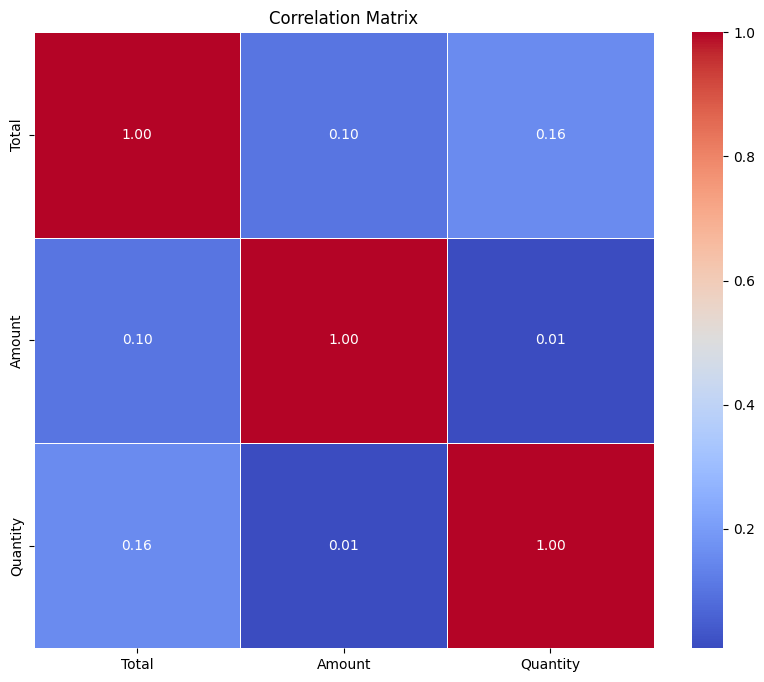

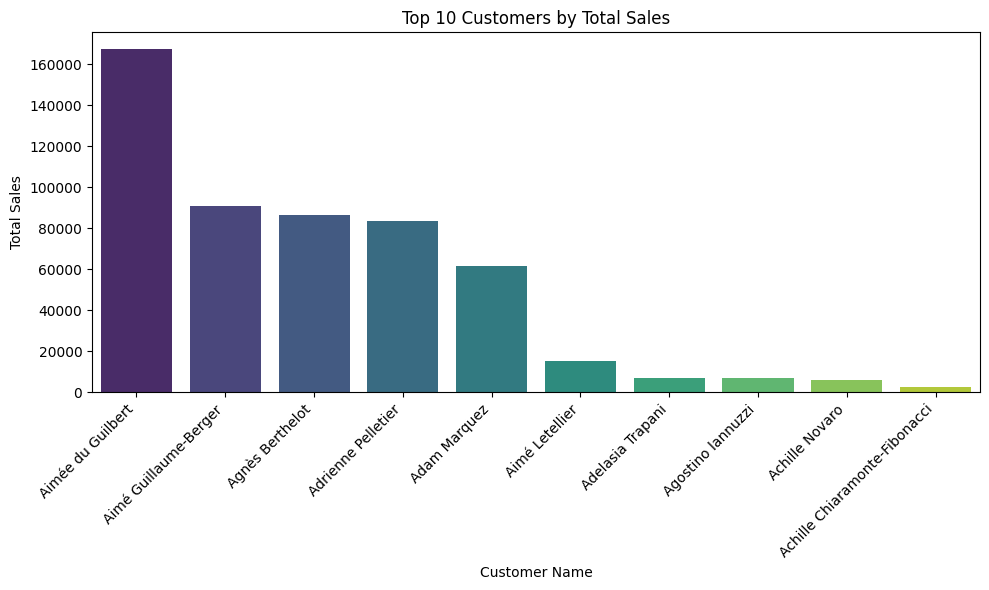

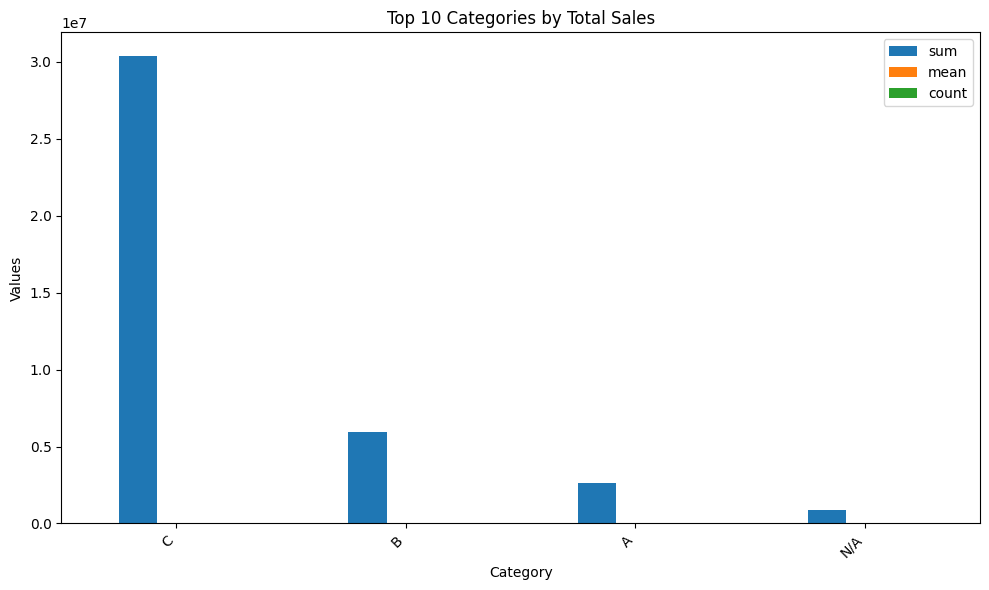

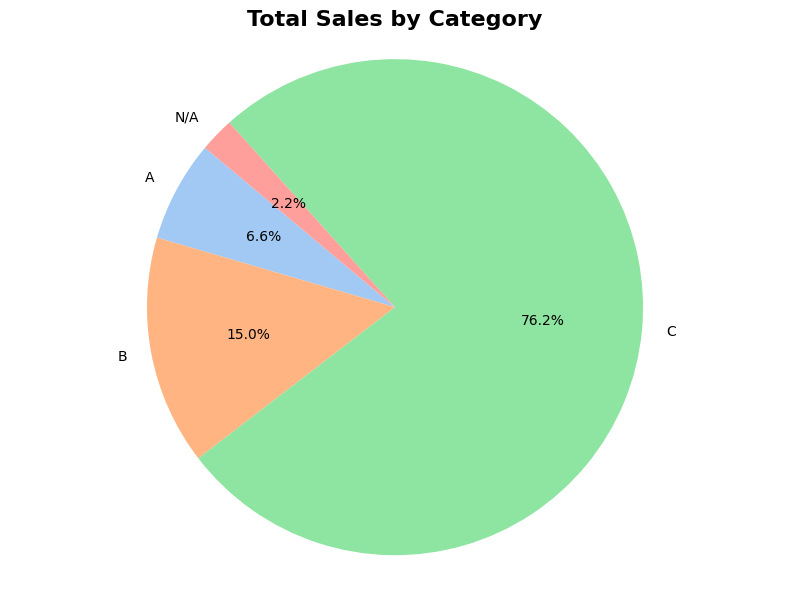

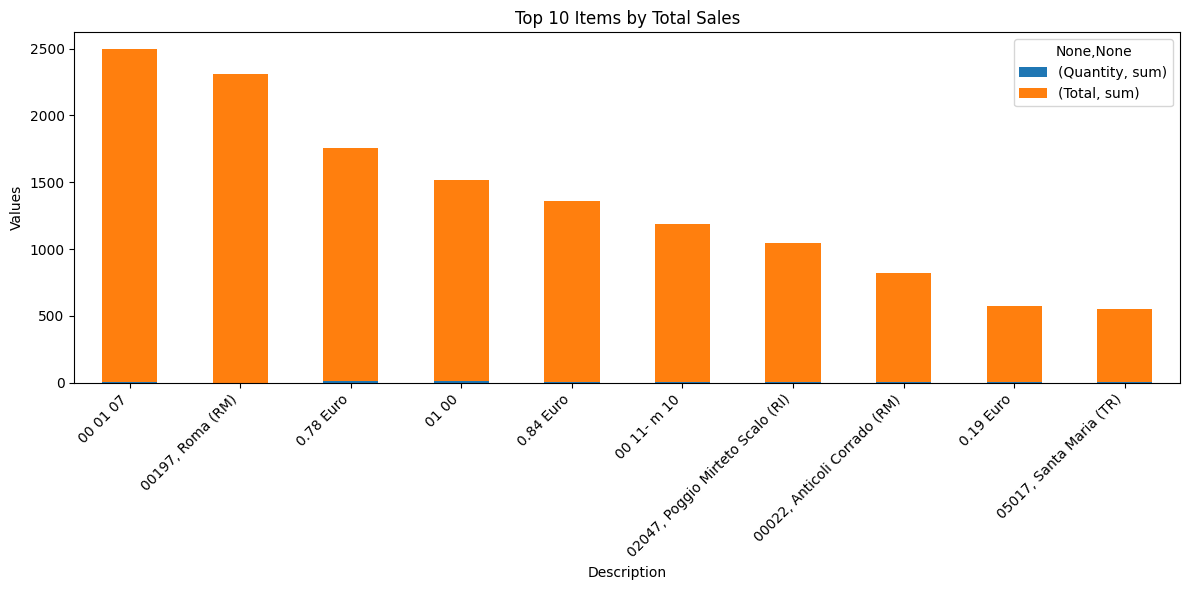

In [13]:
def perform_statistical_analysis(df):
    # Drop 'Customer ID' column
    df = df.drop(columns=['Customer ID'])


    

    descriptive_stats = df.describe()

    numeric_columns = df.select_dtypes(include=['number']).columns
    correlation_matrix = df[numeric_columns].corr()

    customer_analysis = df.groupby('Customer Name')['Total'].agg(['sum', 'count']).head(10)
    customer_analysis = customer_analysis.nlargest(10, 'sum')

    category_analysis = df.groupby('Category')['Total'].agg(['sum', 'mean', 'count']).head(10)
    category_analysis = category_analysis.nlargest(10, 'sum')

    category_sales = df.groupby('Category')['Total'].sum().head(10)

    item_analysis = df.groupby('Description')[['Quantity', 'Total']].agg(['sum']).head(10)
    item_analysis = item_analysis.nlargest(10, ('Total', 'sum'))



 

    correlation_matrix_buf = io.BytesIO()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.savefig(correlation_matrix_buf, format='png')
    correlation_matrix_buf.seek(0)
    correlation_matrix_encoded = base64.b64encode(correlation_matrix_buf.read()).decode()

    customer_analysis_buf = io.BytesIO()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=customer_analysis.index, y='sum', data=customer_analysis, palette='viridis')
    plt.title("Top 10 Customers by Total Sales")
    plt.xlabel("Customer Name")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(customer_analysis_buf, format='png')
    customer_analysis_buf.seek(0)
    customer_analysis_encoded = base64.b64encode(customer_analysis_buf.read()).decode()

    category_analysis_buf = io.BytesIO()
    category_analysis.plot(kind='bar', figsize=(10, 6))
    plt.title("Top 10 Categories by Total Sales")
    plt.xlabel("Category")
    plt.ylabel("Values")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(category_analysis_buf, format='png')
    category_analysis_buf.seek(0)
    category_analysis_encoded = base64.b64encode(category_analysis_buf.read()).decode()

    category_sales_buf = io.BytesIO()
    plt.figure(figsize=(8, 6))
    ax = category_sales.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
    ax.set_title('Total Sales by Category', fontsize=16, fontweight='bold')
    plt.ylabel('')
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig(category_sales_buf, format='png')
    category_sales_buf.seek(0)
    category_sales_encoded = base64.b64encode(category_sales_buf.read()).decode()

    item_analysis_buf = io.BytesIO()
    item_analysis.plot(kind='bar', figsize=(12, 6), stacked=True)
    plt.title("Top 10 Items by Total Sales")
    plt.xlabel("Description")
    plt.ylabel("Values")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(item_analysis_buf, format='png')
    item_analysis_buf.seek(0)
    item_analysis_encoded = base64.b64encode(item_analysis_buf.read()).decode()

    # Return encoded strings
    return correlation_matrix_encoded, customer_analysis_encoded, category_analysis_encoded, category_sales_encoded, item_analysis_encoded , descriptive_stats, correlation_matrix, customer_analysis, category_analysis, category_sales, item_analysis
perform_statistical_analysis(df)

/var/folders/yx/d2z__2kd35b0k7rjytjgykzw0000gn/T/ipykernel_71358/4015031460.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_analysis.index, y='sum', data=customer_analysis, palette='viridis')


(              Total        Amount      Quantity
 count  26482.000000  26502.000000  26502.000000
 mean    1505.935591     49.750049      4.932722
 std      739.737957     64.244042      2.582557
 min        0.330000      0.050000      1.000000
 25%      956.570000     22.710000      3.000000
 50%     1472.745000     46.470000      5.000000
 75%     1986.652500     73.810000      7.000000
 max     4922.740000   2742.540000      9.000000,
                   sum         mean  count
 Category                                 
 C         30394306.50  1522.455745  19964
 B          5963628.06  1488.302486   4007
 A          2626722.26  1364.531044   1925
 N/A         895529.50  1528.207338    586,
 Category
 A       2626722.26
 B       5963628.06
 C      30394306.50
 N/A      895529.50
 Name: Total, dtype: float64,
                                  Quantity    Total
                                       sum      sum
 Description                                       
 00 01 07              

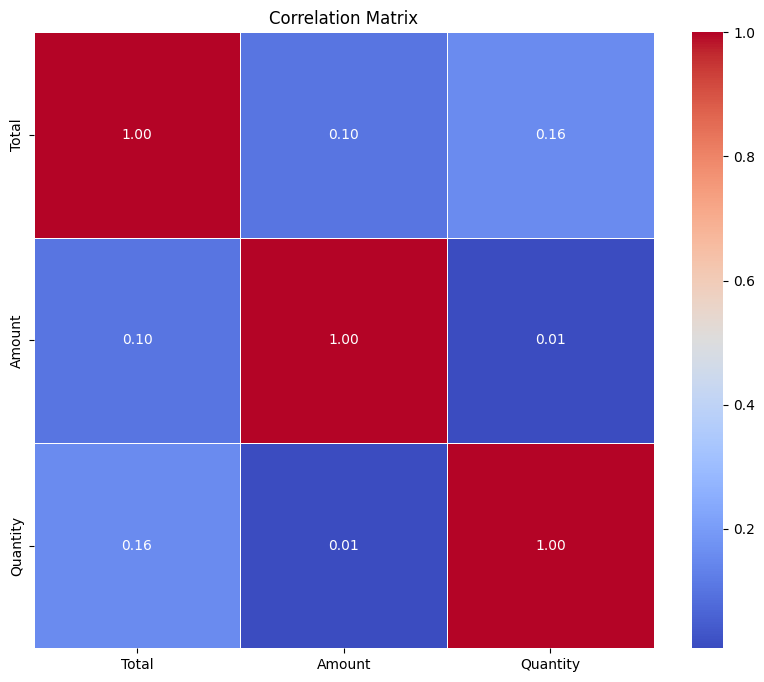

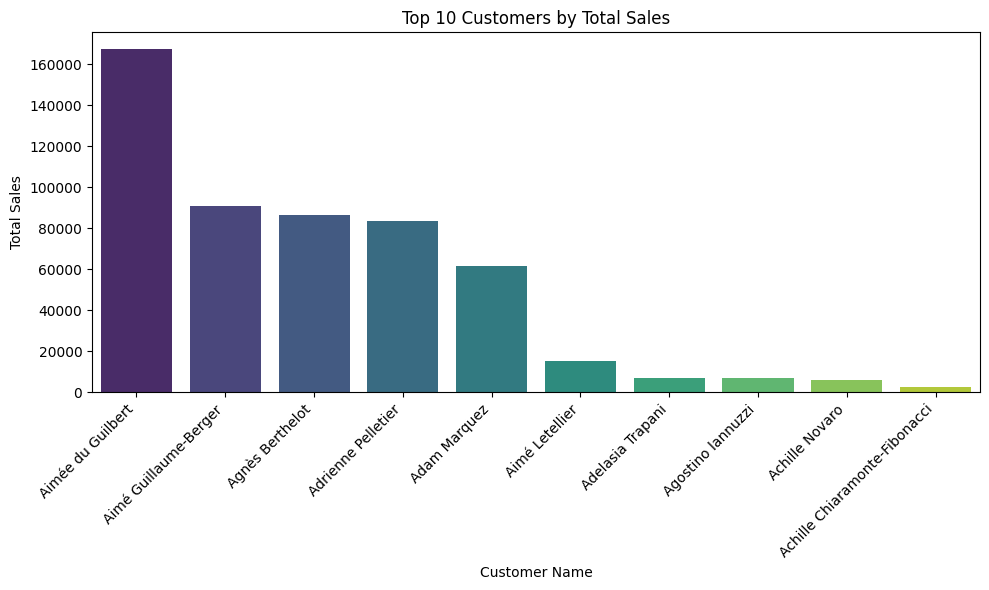

In [14]:
import io
import base64
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def perform_statistical_analysis(df):
    # Drop 'Customer ID' column
    df = df.drop(columns=['Customer ID'])

    descriptive_stats = df.describe()

    numeric_columns = df.select_dtypes(include=['number']).columns
    correlation_matrix = df[numeric_columns].corr()

    customer_analysis = df.groupby('Customer Name')['Total'].agg(['sum', 'count']).head(10)
    customer_analysis = customer_analysis.nlargest(10, 'sum')

    category_analysis = df.groupby('Category')['Total'].agg(['sum', 'mean', 'count']).head(10)
    category_analysis = category_analysis.nlargest(10, 'sum')

    category_sales = df.groupby('Category')['Total'].sum().head(10)

    item_analysis = df.groupby('Description')[['Quantity', 'Total']].agg(['sum']).head(10)
    item_analysis = item_analysis.nlargest(10, ('Total', 'sum'))

    # Encode the images as base64 strings
    correlation_matrix_buf = io.BytesIO()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.savefig(correlation_matrix_buf, format='png')
    correlation_matrix_buf.seek(0)
    correlation_matrix_encoded = base64.b64encode(correlation_matrix_buf.read()).decode()

    customer_analysis_buf = io.BytesIO()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=customer_analysis.index, y='sum', data=customer_analysis, palette='viridis')
    plt.title("Top 10 Customers by Total Sales")
    plt.xlabel("Customer Name")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(customer_analysis_buf, format='png')
    customer_analysis_buf.seek(0)
    customer_analysis_encoded = base64.b64encode(customer_analysis_buf.read()).decode()

    # Return encoded strings and other statistical data
    return descriptive_stats, category_analysis, category_sales, item_analysis, correlation_matrix_encoded, customer_analysis_encoded

# Example usage:
perform_statistical_analysis(df)


/var/folders/yx/d2z__2kd35b0k7rjytjgykzw0000gn/T/ipykernel_71358/1767282782.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_analysis.index, y='sum', data=customer_analysis, palette='viridis')


('iVBORw0KGgoAAAANSUhEUgAAAyAAAAJYCAYAAACadoJwAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAB+1ElEQVR4nO3dd5yU5aH+/+uZur3DFljYQu9NVFABEbGXYDmWqElMMdF8T6JJTqpJTsyJ0fR4Yn5qjB5jxQ6CBUVEsNB7XzoLbO+7U57fH+iGZSkL7Mw95fN+vXjJzDwzzzXL7rrX3s9935Zt27YAAAAAIAwcpgMAAAAAiB8UEAAAAABhQwEBAAAAEDYUEAAAAABhQwEBAAAAEDYUEAAAAABhQwEBAAAAEDYUEAAAAABhQwEBAAAAEDYUEAAAAABhQwEBAAAAEDYUEAAAAABhQwEBAAAAEDYUEAAAAABhQwEB4khRUZEsyzqlP9u3bzcd/7iOfG+nYs2aNbrjjjs0dOhQpaamyu12q0ePHho4cKCmTZum7373u/rnP//Zrbl//vOfd8jd3a/f3SZPnhzxnxeBQEAvvfSSbrvtNg0ePFiZmZlyuVxKT0/XyJEj9dWvflWvv/66AoGA6agAEJdcpgMAiG3bt29XcXFx++1JkyZp/vz55gIdw9/+9jd9+9vflt/v73B/RUWFKioqtGnTJr3zzjtyOp267bbbzITECS1evFi33HKLtmzZ0umxuro6rVq1SqtWrdKjjz6qP/3pT/r2t7/dLectKirSjh072m/btt0trwsAsYgCAsSRSy65RAcOHOhw37p167R+/fr223379tW4ceM6PTc5OTnk+UxZvny57rzzTgWDwfb7hg4dqr59+0qSdu/erQ0bNqitrc1URHTBK6+8omuvvbZTiRw8eLBKS0vV2tqqjRs3aufOnZLU4d8bABA+FBAgjvzv//5vp/t+/vOf6xe/+EX77cmTJ0f8ZUDd7Z///GeHH0

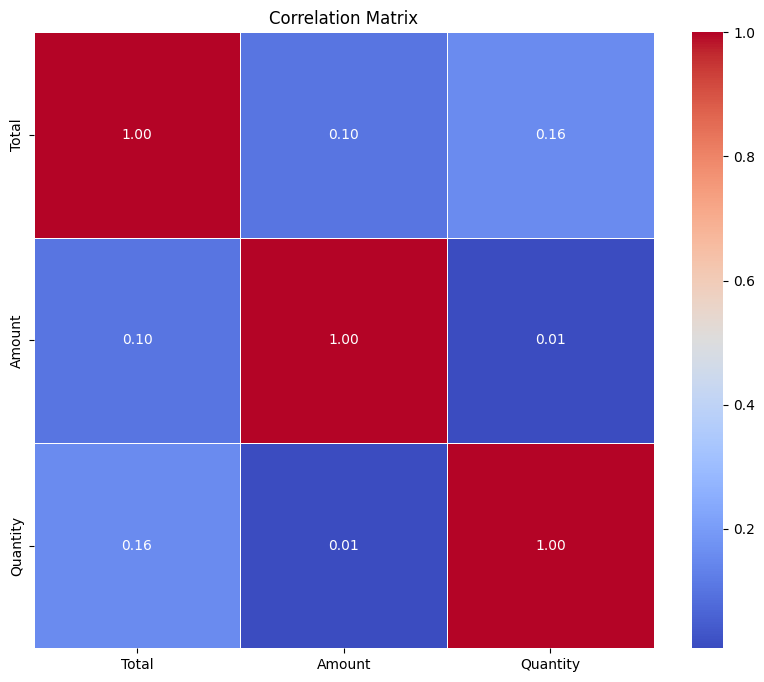

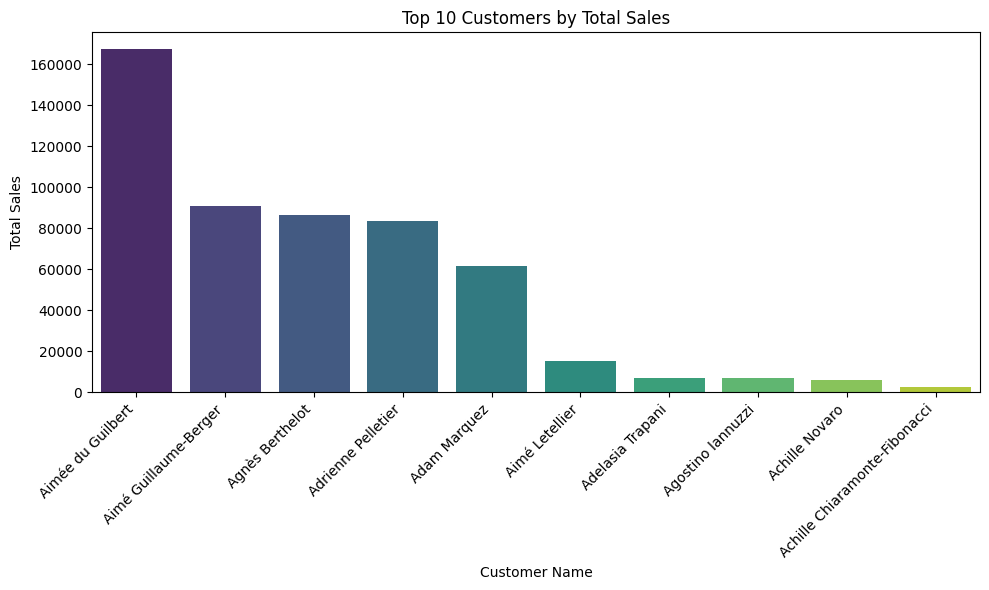

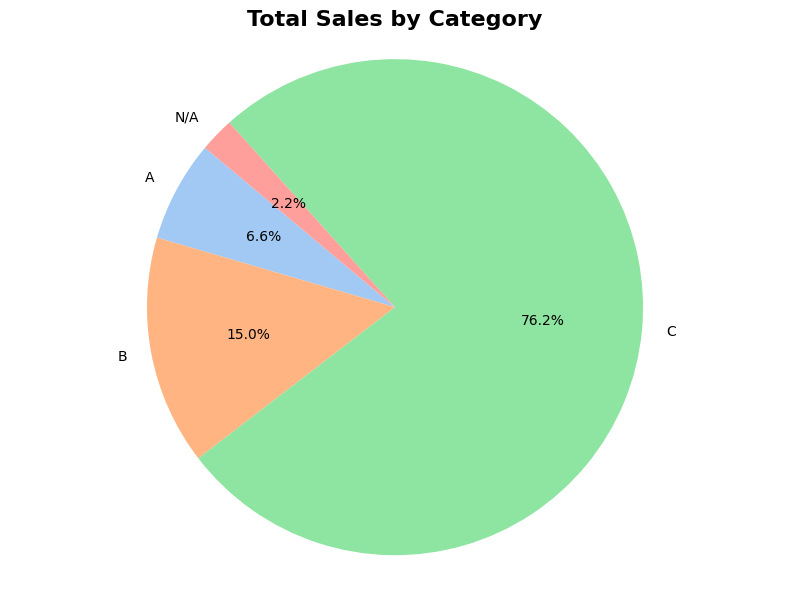

<Figure size 1200x600 with 0 Axes>

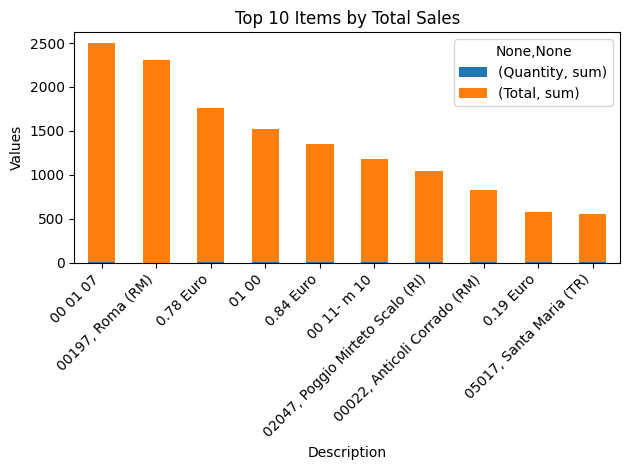

In [15]:
import io
import base64
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def perform_statistical_analysis(df):
    # Drop 'Customer ID' column
    df = df.drop(columns=['Customer ID'])

    descriptive_stats = df.describe()

    numeric_columns = df.select_dtypes(include=['number']).columns
    correlation_matrix = df[numeric_columns].corr()

    customer_analysis = df.groupby('Customer Name')['Total'].agg(['sum', 'count']).head(10)
    customer_analysis = customer_analysis.nlargest(10, 'sum')

    category_analysis = df.groupby('Category')['Total'].agg(['sum', 'mean', 'count']).head(10)
    category_analysis = category_analysis.nlargest(10, 'sum')

    category_sales = df.groupby('Category')['Total'].sum().head(10)

    item_analysis = df.groupby('Description')[['Quantity', 'Total']].agg(['sum']).head(10)
    item_analysis = item_analysis.nlargest(10, ('Total', 'sum'))

    # Encode the images as base64 strings
    correlation_matrix_buf = io.BytesIO()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.savefig(correlation_matrix_buf, format='png')
    correlation_matrix_buf.seek(0)
    correlation_matrix_encoded = base64.b64encode(correlation_matrix_buf.read()).decode()

    customer_analysis_buf = io.BytesIO()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=customer_analysis.index, y='sum', data=customer_analysis, palette='viridis')
    plt.title("Top 10 Customers by Total Sales")
    plt.xlabel("Customer Name")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(customer_analysis_buf, format='png')
    customer_analysis_buf.seek(0)
    customer_analysis_encoded = base64.b64encode(customer_analysis_buf.read()).decode()

    category_sales_buf = io.BytesIO()
    plt.figure(figsize=(8, 6))
    ax = category_sales.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
    ax.set_title('Total Sales by Category', fontsize=16, fontweight='bold')
    plt.ylabel('')
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig(category_sales_buf, format='png')
    category_sales_buf.seek(0)
    category_sales_encoded = base64.b64encode(category_sales_buf.read()).decode()

    item_analysis_buf = io.BytesIO()
    plt.figure(figsize=(12, 6))
    item_analysis.plot(kind='bar', stacked=True)
    plt.title("Top 10 Items by Total Sales")
    plt.xlabel("Description")
    plt.ylabel("Values")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(item_analysis_buf, format='png')
    item_analysis_buf.seek(0)
    item_analysis_encoded = base64.b64encode(item_analysis_buf.read()).decode()

    # Return encoded strings and other statistical data
    return   category_sales_encoded, item_analysis_encoded , descriptive_stats, correlation_matrix, customer_analysis, category_analysis, category_sales, item_analysis

# Example usage:
perform_statistical_analysis(df)


In [16]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
yearly_sales = df.groupby('Year')['Total'].sum()

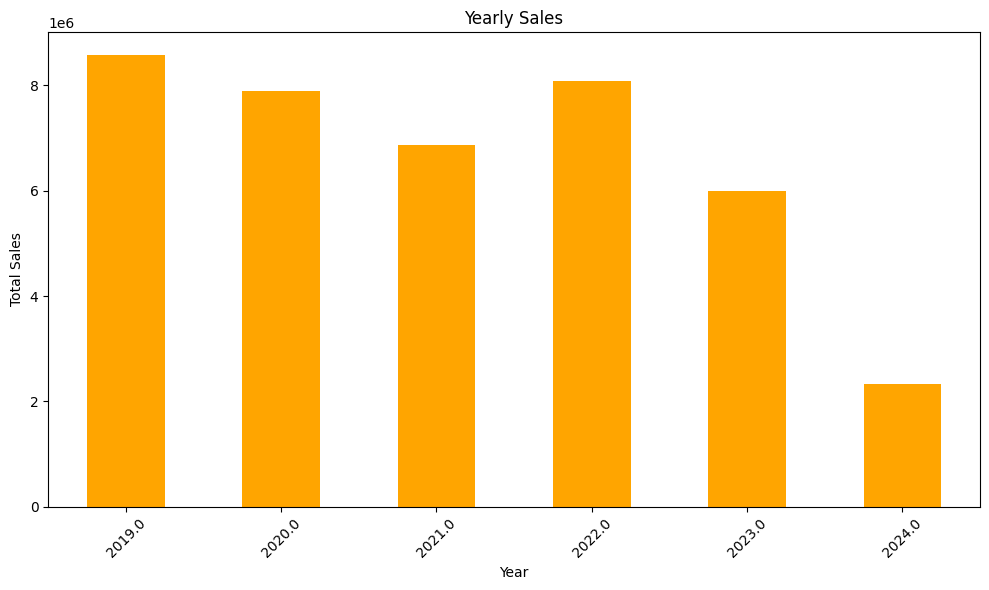

In [17]:
yearly_sales_buf = io.BytesIO()
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar', color='orange')
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(yearly_sales_buf, format='png')
yearly_sales_buf.seek(0)
yearly_sales_encoded = base64.b64encode(yearly_sales_buf.read()).decode()